<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загружаем-данные" data-toc-modified-id="Загружаем-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загружаем данные</a></span></li><li><span><a href="#Проведем-исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Проведем-исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проведем исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#ВЫВОДЫ:" data-toc-modified-id="ВЫВОДЫ:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ВЫВОДЫ:</a></span></li></ul></li><li><span><a href="#Построим-модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Построим-модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построим модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#ВЫВОД:-на-основании-анализа-метрик-модель-полученная-на-основании-логистической-регрессии-показала-себя-лучше-случайного-леса." data-toc-modified-id="ВЫВОД:-на-основании-анализа-метрик-модель-полученная-на-основании-логистической-регрессии-показала-себя-лучше-случайного-леса.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ВЫВОД: на основании анализа метрик модель полученная на основании логистической регрессии показала себя лучше случайного леса.</a></span></li></ul></li><li><span><a href="#Сделаем-кластеризацию-клиентов" data-toc-modified-id="Сделаем-кластеризацию-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сделаем кластеризацию клиентов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></div>

# Основы машинного обучения

**Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Задача — провести анализ и подготовить план действий по удержанию клиентов.**

In [1]:
# загружаем необходимые бибилиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
import itertools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Данные клиента за предыдущий до проверки факта оттока месяц:**
 - 'gender' — пол;
 - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
 - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
 - 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
 - 'Phone' — наличие контактного телефона;
 - 'Age' — возраст;
 - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
 - 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
 - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
 - 'Group_visits' — факт посещения групповых занятий;
 - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
 - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
 - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
 - 'Churn' — факт оттока в текущем месяце.

## Загружаем данные

In [2]:
# загружаем данные
df = pd.read_csv('/datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
# для удобства приводим все заголовки к единому регистру
df.columns = map(str.lower, df.columns)
# альтернативнй способ df.columns = df.columns.str.lower()

## Проведем исследовательский анализ данных (EDA)

In [4]:
# смотрим размер матрицы
df.shape

(4000, 14)

In [5]:
# изучим размер группы оставшихся и покинувших фитнес-центр
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [6]:
# посмотрим на распределение значений 'churn' в долях
round(df['churn'].value_counts(normalize = True),2)

0    0.73
1    0.27
Name: churn, dtype: float64

In [7]:
# распределение по клиентов по полу
df['gender'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64

In [8]:
# посмотрим средние значения и стандартные отклонения
cv = df.describe().T
cv

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [9]:
# оценим стандартное отклонение по соотношению std/mean
cv['cv'] = cv['std']/cv['mean']
cv

,count,mean,std,min,25%,50%,75%,max,cv
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000,0.979828
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000,0.427934
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000,1.026989
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000,1.497348
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000,0.326854
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000,0.971900
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000,1.194181
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000,0.111648
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740,0.655731
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000,0.969591


In [10]:
# посмотрим общую информацию и наличие нулевых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [11]:
# проверка на дубли
df.duplicated().sum()

0

In [12]:
# изучим средние значения признаков сгруппировав по 'churn'
round(df.groupby('churn').agg('mean').T,2)

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


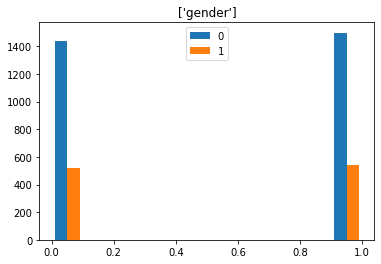

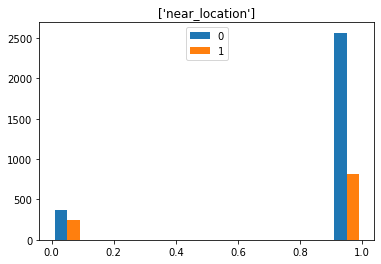

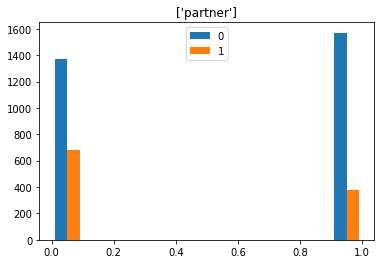

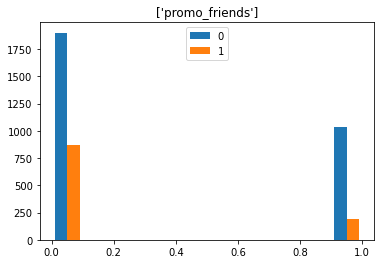

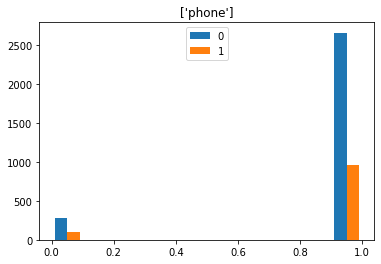

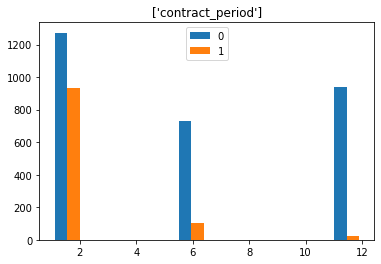

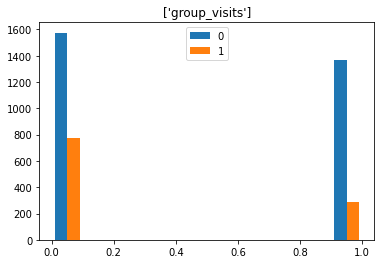

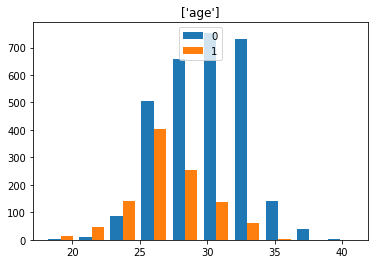

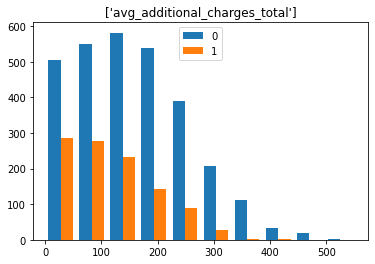

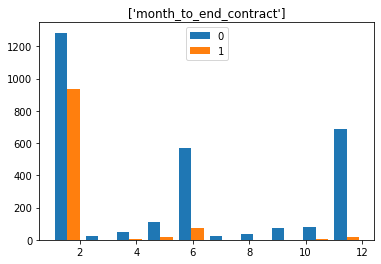

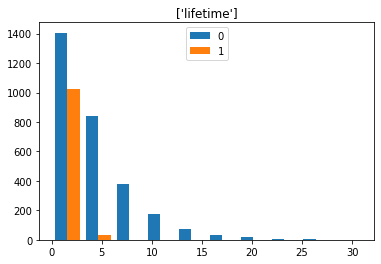

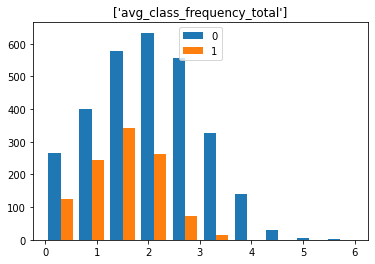

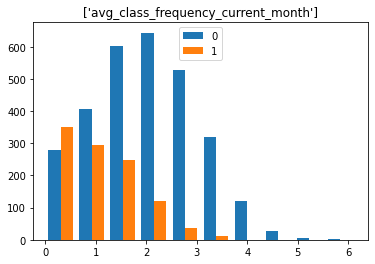

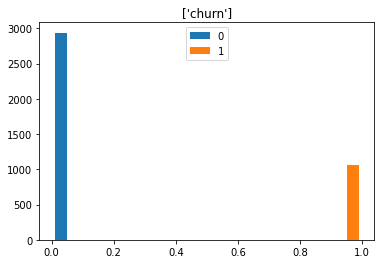

In [14]:
# построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
churn_0 = df[df['churn'] == 0]
churn_1 = df[df['churn'] == 1]

for col in df.columns:
    plt.hist([churn_0[col], churn_1[col]])
    plt.title([col])
    plt.legend(df['churn'].unique(), loc = 'upper center')
    plt.show()
    
    

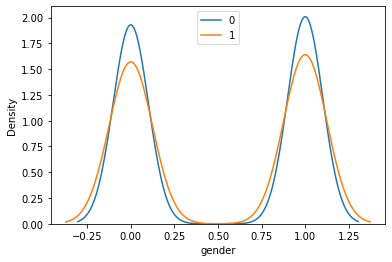

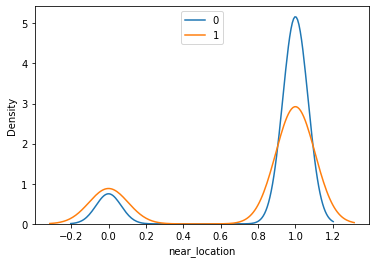

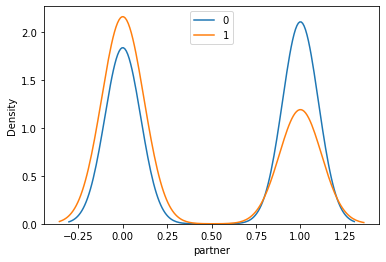

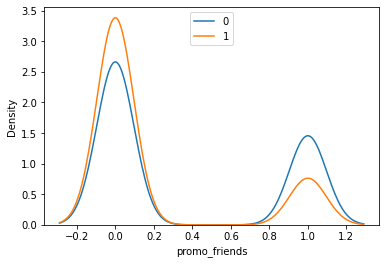

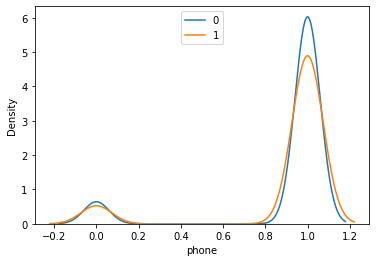

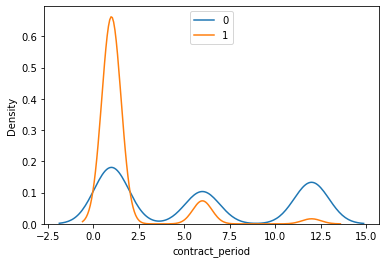

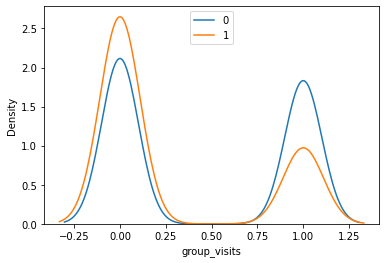

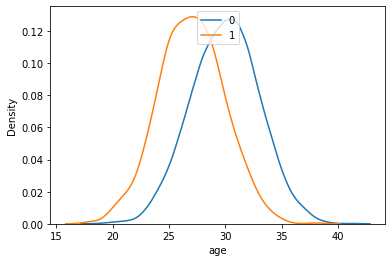

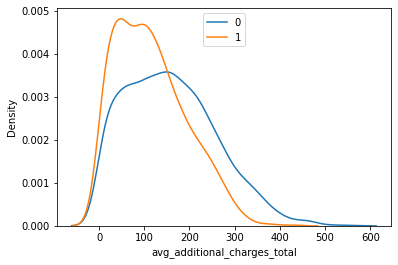

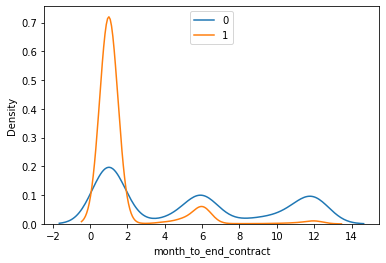

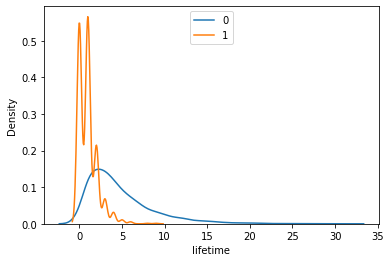

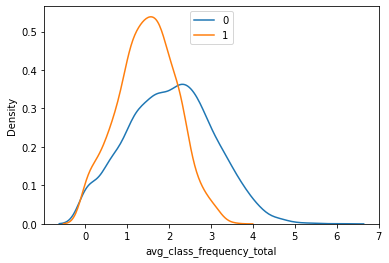

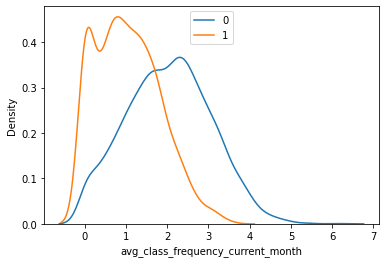

In [16]:
for col in df.drop('churn', axis = 1).columns:
    sns.kdeplot(churn_0[col])
    sns.kdeplot(churn_1[col])
    plt.legend(df['churn'].unique(), loc = 'upper center')
    plt.show()
    

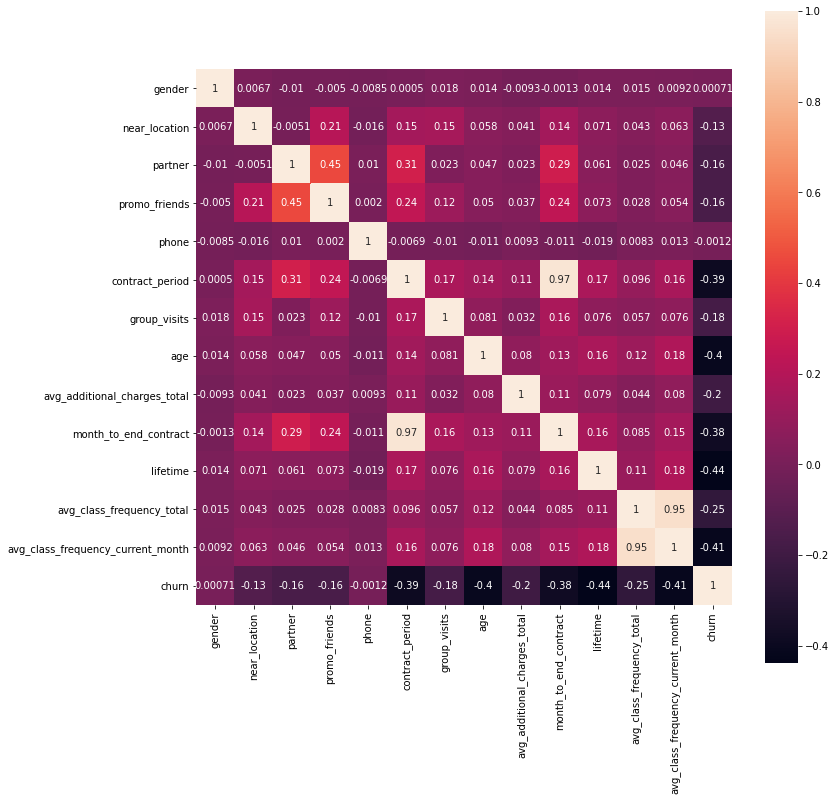

In [17]:
# построем матрицу корреляций и отобразим её
cm = df.corr()

plt.figure(figsize = (12,12))
sns.heatmap(cm, annot = True, square = True)

plt.show()

In [18]:
# удаляем признак 'month_to_end_contract', так как он очень сильно коррелирует с признаком "contract_period"
df = df.drop('month_to_end_contract', axis = 1)

### ВЫВОДЫ:
1. Предобработка данных показала, что пропусков нет, дубликатов тоже нет;
2. Доля оттока составляет 27% от всех клиентов выборки;
3. Показатели среднего и стандартного отклонения на первый взгляд не вызывают вопросов;
4. Изучив показатели средних значений тех, кто ушел и тех, кто остался можно сделать следующие предварительные заключения:
   - в рамках акции "Приведи друга" в итоге остается практически в два раза больше людей, чем уходят;
   - у тех кто попадает в отток, в среднем длительность абонемента составляет 1,7 месяцев, напротив те кто остаются приобретают в среднем абонемент на полгода;
   - те кто в оттоке в среднем значительно реже посещают групповые занятия;
   - посетители, которые собираются и дальше ходить в спортзал имеют на руках абонемент с длительностью более 5 месяцев, в то время, как у противоположной группы до конца срока действия абонимента остается меньше 2-х месяцев;
   - lifetime у тех, кто остается составляет около 5-ти месяцев, те кто в уходит в отток этот показатель составляет в среднем около 1-го месяца;
   - за месяц до оттока люди наинают посещать спортзал в два раза реже в неделю, чем те, кто остается;
   - остальные признаки в среднем идентичны у обеих групп.
5. Исследуя графики можно увидеть, что:
   - отток у мужчин и женщин одинаков;
   - подавляющее большинство посетителей либо живут, либо работают в том же районе, где находится фитнес-центр. Незначительная часть посетителей приезжают из других районов, но и отток среди них существенный (приблезительно 2/3 от тех, кто остался);
   - по партнерской программе приходят незначительно больше посетителей, чем остальных, но отток среди них значительно меньше;
   - по акции "приведи друга" приходят меньше, чем без нее, но отток среди друзей гораздо ниже;
   - телефон оставляют практически всегда, но на соотношении оттока и оставшихся среди тех кто оставил номер телефона и нет это не влияет;
   - больше половины всех посетителей берут абонимент на 1 месяц, но и отток среди них значительный. С увеличением срока абонимента доля оттока сокращается;
   - отток, тех кто посещает групповые занятия более чем в два раза меньше, чем у тех, кто не посещает;
   - среди посетителей не достигших возраста 25 лет отток стабильно больше притока, а начиная с 25 лет картина меняется. Основная часть - посетители от 25 до 35 лет. С у величением возраста отток уменьшается;
   - с увеличением суммы трат на сопутствующие услуги фитнес-центра снижается доля оттока;
   - значительная часть оттока есть среди тех у кого до окончания срока абонимента остается 1 месяц, это коррелирует с признаком срока действия абонимента. Этот признак удаляем;
   - lifetime у тех, кто остается составляет около 5-ти месяцев, те кто в уходит в отток этот показатель составляет в среднем около 1-го месяца;
   

## Построим модель прогнозирования оттока клиентов

### LogisticRegression

In [21]:
# разделим данные на признаки (Х) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

In [22]:
# разделим выборки на обучающую и валидационную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Примечание: В идеале нужно разбить на тренировочную, валидационную и тестовую выборки. Потом выбрать лучшую модель на валидационной выборке и проверить её качество на тестовой. Можно <a href="https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c">тут</a> про это прочитать.

    
В функции `train_test_split` есть параметр `stratify`. Колонку, которую ставим в качестве значения параметра (обычно, это таргет) будет разделена между выборками таким образом, что соотношение значений в группе в выборках будет одинаковым. Частенько используется при несблансированном таргете для корректировки смещения предсказаний. Можно прочитать в <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split">документации</a>

In [23]:
# стандартизируем данные
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [24]:
# зададим алгоритм для модели
model_l = LogisticRegression(solver = 'liblinear', random_state = 0)    
# обучим модель
model_l.fit(X_train_st, y_train)
# сделаем прогноз
predict_l = model_l.predict(X_test_st)

In [25]:
print('Метрики прогноза логистической регрессией')
print('Accuracy:{:.2f}'.format(accuracy_score(y_test, predict_l)))
print('Precision:{:.2f}'.format(precision_score(y_test, predict_l)))
print('Recall:{:.2f}'.format(recall_score(y_test, predict_l)))

Метрики прогноза логистической регрессией
Accuracy:0.92
Precision:0.85
Recall:0.83


### RandomForest

In [26]:
# зададим алгоритм для модели
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 0)    
# обучим модель
model_rf.fit(X_train, y_train)
# сделаем прогноз
predict_rf = model_rf.predict(X_test)

In [27]:
print('Метрики прогноза случайным лесом')
print('Accuracy:{:.2f}'.format(accuracy_score(y_test, predict_rf)))
print('Precision:{:.2f}'.format(precision_score(y_test, predict_rf)))
print('Recall:{:.2f}'.format(recall_score(y_test, predict_rf)))

Метрики прогноза случайным лесом
Accuracy:0.92
Precision:0.84
Recall:0.82


### ВЫВОД: на основании анализа метрик модель полученная на основании логистической регрессии показала себя лучше случайного леса.

## Сделаем кластеризацию клиентов

In [28]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

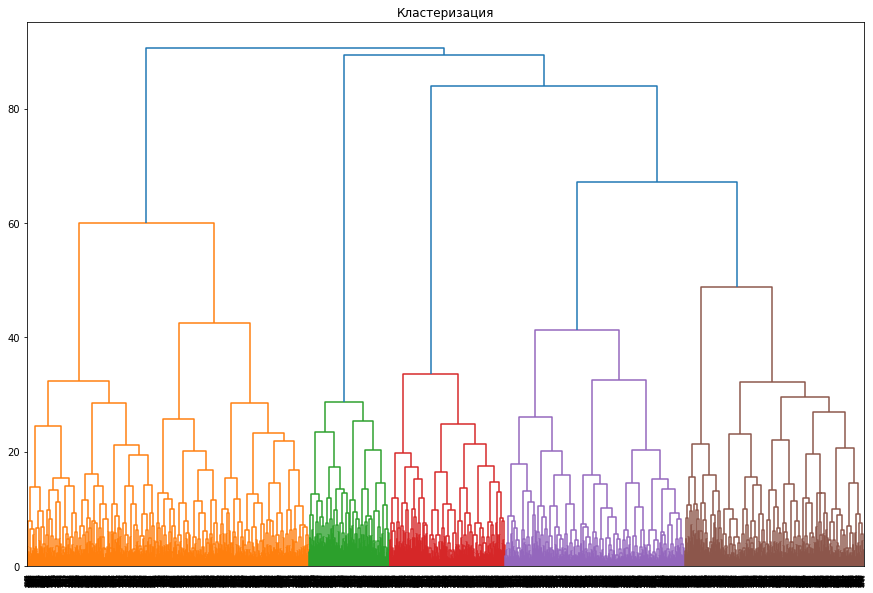

In [29]:
# построим матрицу "расстояний"
linked = linkage(X_sc, method = 'ward')
# визуализируем таблицу связок
plt.figure(figsize = (15, 10))
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация')
plt.show()

Судя по цветовой гамме можно выделить 5 кластеров.

In [30]:
# задаем модель KMeans
km = KMeans(n_clusters = 5, random_state = 0)
# формируем вектор кластеров
labels = km.fit_predict(X_sc)

In [31]:
# сохраним вектор кластера в поле датасета
df['clusters_km'] = list(labels)

In [37]:
# посмотрим на средние значения признаков для кластеров
df.groupby('clusters_km').agg('mean').T

clusters_km,0,1,2,3,4
gender,0.478392,0.524675,0.494515,0.568736,0.495310
near_location,0.993970,0.862338,1.000000,0.970067,0.000000
partner,0.947739,0.472727,0.240506,0.307095,0.487805
promo_friends,0.879397,0.306494,0.095359,0.097561,0.075047
phone,1.000000,0.000000,1.000000,0.998891,1.000000
contract_period,7.831156,4.758442,2.483544,5.137472,2.859287
group_visits,0.536683,0.425974,0.331646,0.483370,0.228893
age,29.629146,29.283117,28.216034,30.288248,28.566604
avg_additional_charges_total,154.788356,144.240418,131.341969,166.180576,136.384285
lifetime,4.447236,3.922078,2.440506,5.011086,2.911820


**Вывод**
1. Самые низкие показатели 'churn' у 3 и 0 кластеров, а самые высокие у 2 и 4;
2. 4 кластер живет в другом районе; 
3. Кластер 1 не оставляет номер телефона;
4. Самые высокие показатели длительности действия абонимента у 0 и 3 кластеров. У 0 и 3 кластеров больше всех групповых занятий.

In [38]:
# распределение признаков по кластерам
def show_clusters_on_plot(data, x_name, y_name, cluster_name):
    plt.figure(figsize = (5,5))
    sns.scatterplot(data[x_name], data[y_name], hue = data[cluster_name], palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [48]:
col_pairs = list(itertools.combinations(df.drop('clusters_km', axis = 1).columns,2))

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


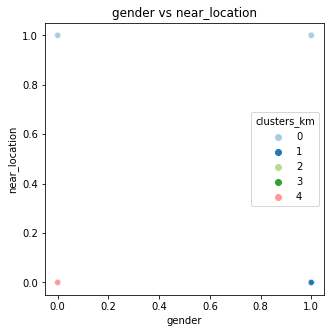

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


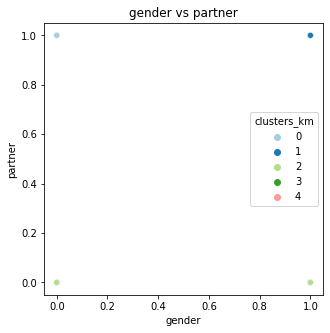

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


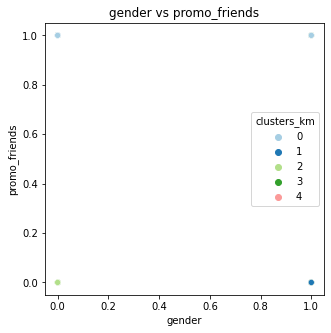

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


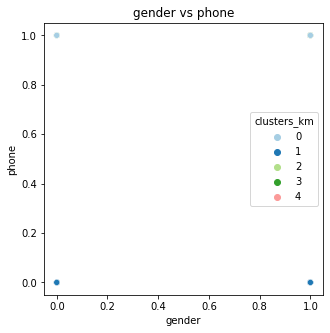

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


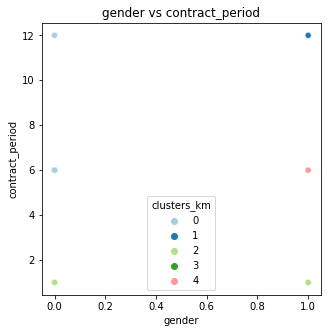

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


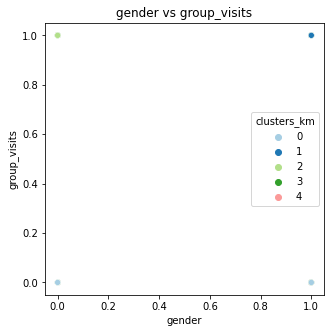

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


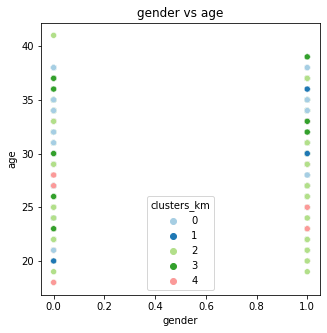

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


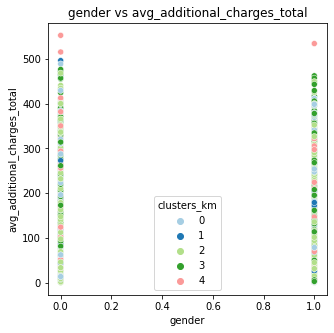

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


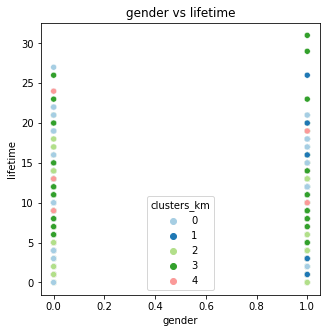

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


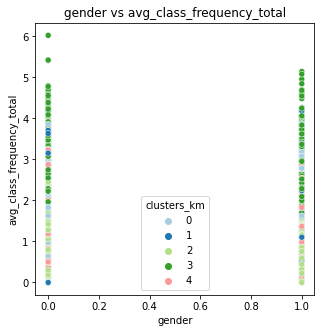

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


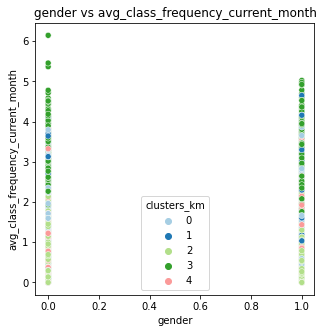

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


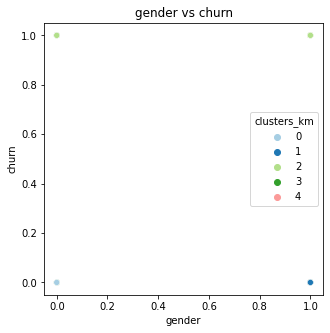

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


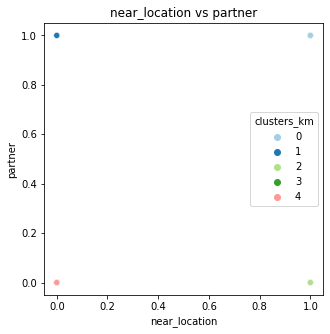

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


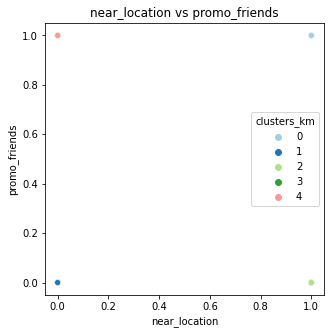

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


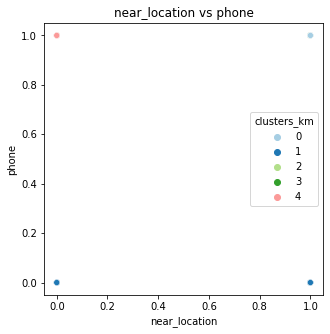

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


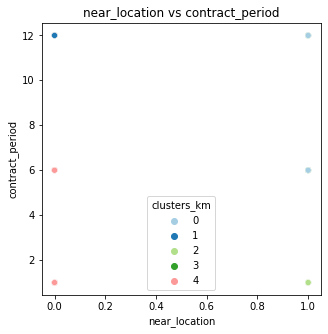

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


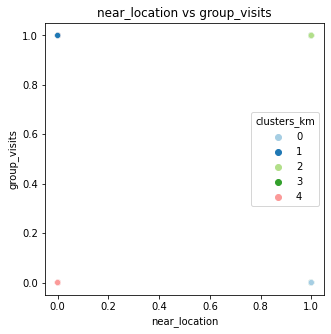

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


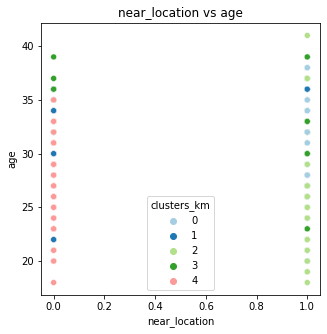

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


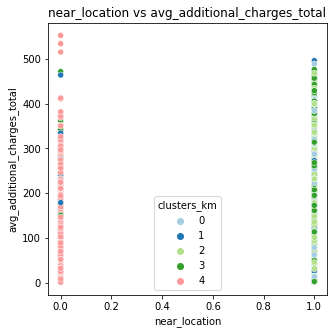

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


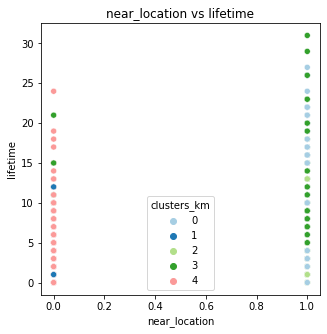

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


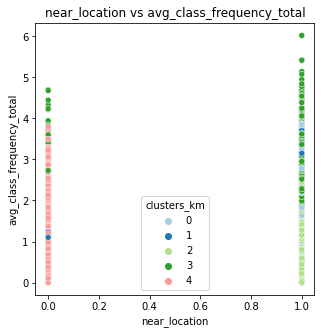

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


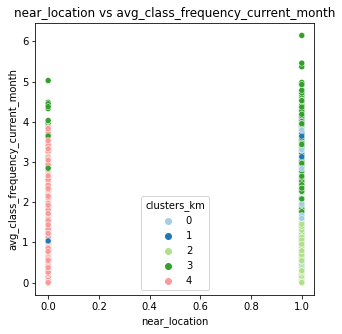

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


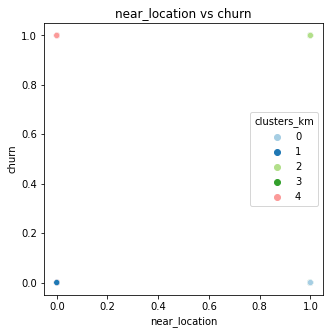

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


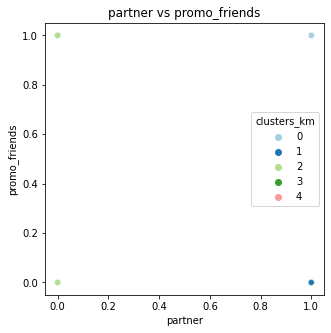

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


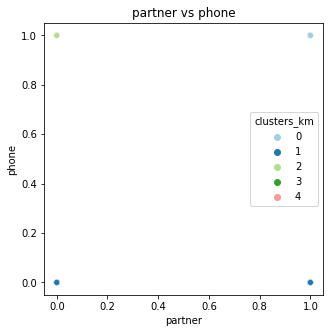

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


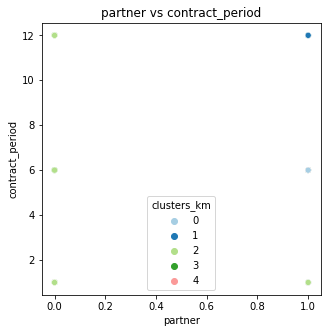

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


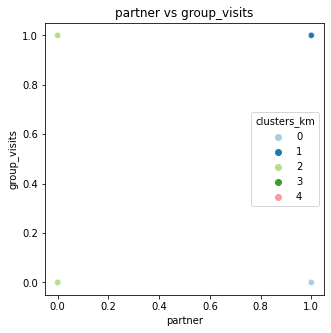

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


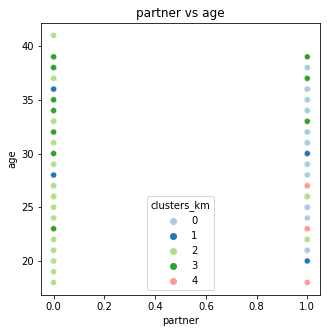

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


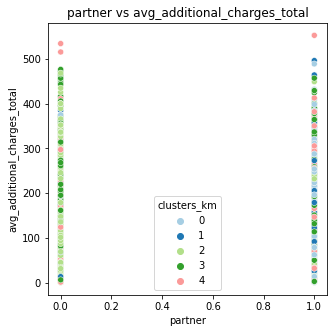

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


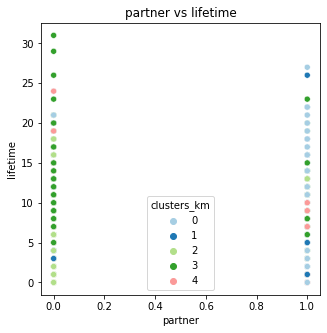

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


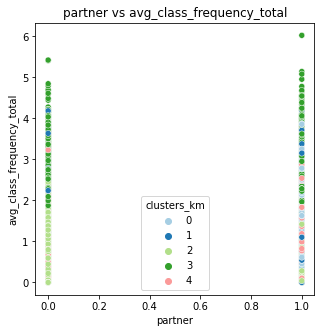

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


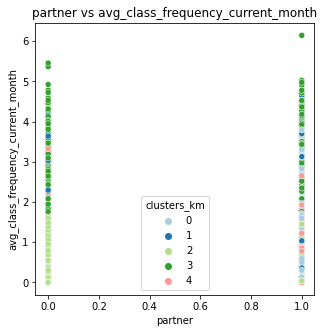

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


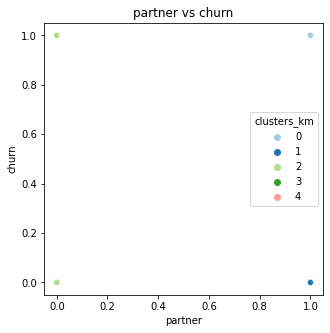

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


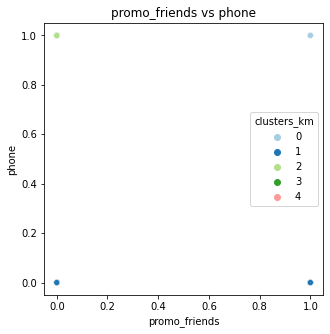

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


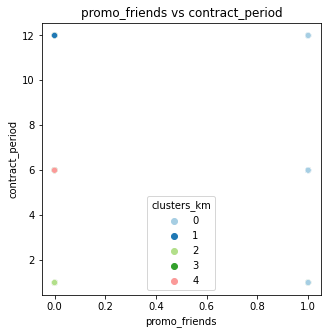

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


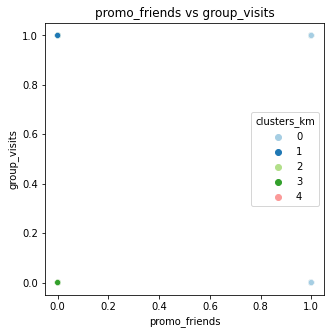

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


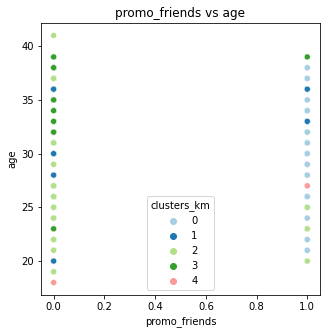

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


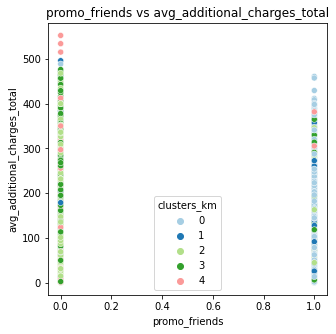

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


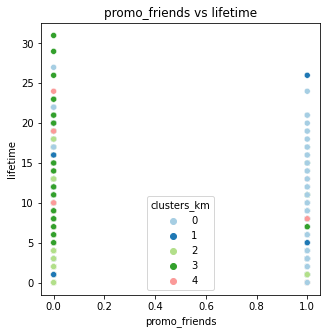

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


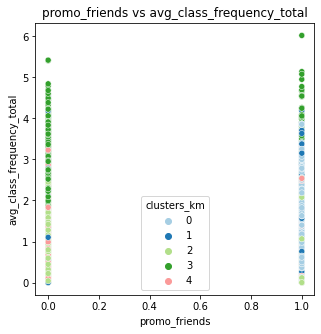

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


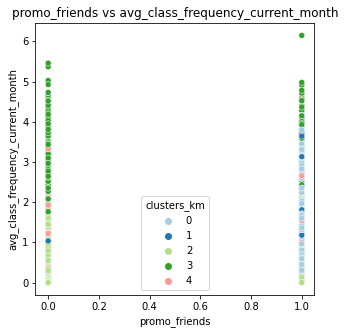

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


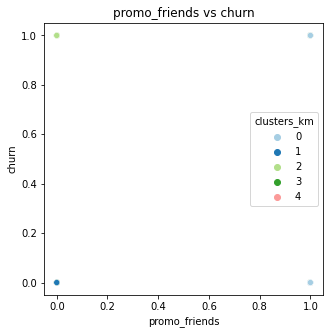

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


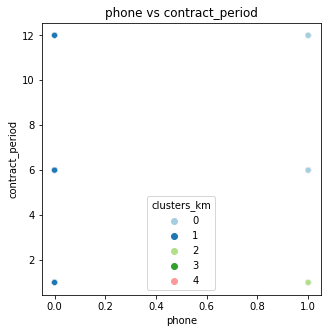

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


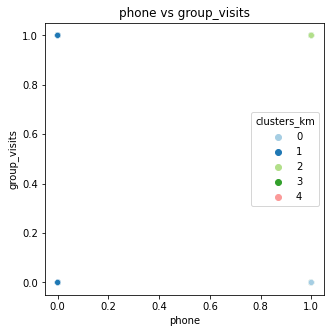

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


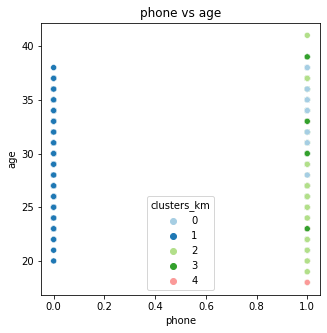

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


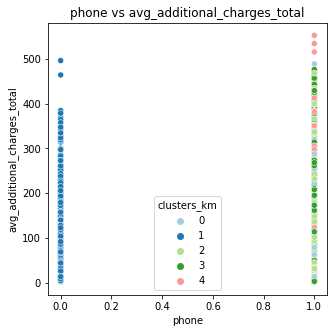

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


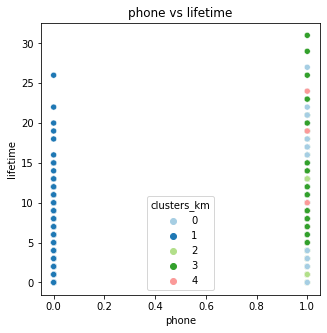

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


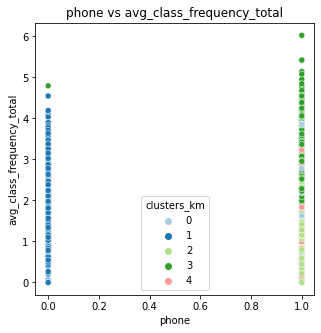

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


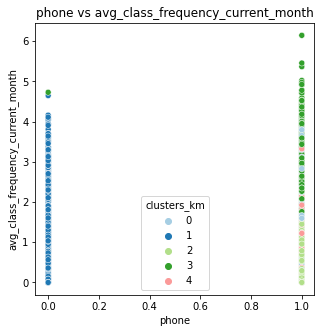

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


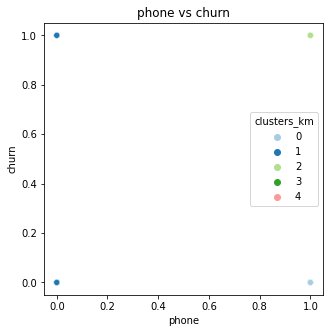

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


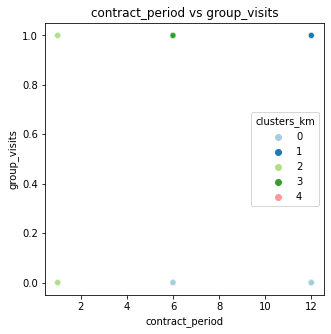

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


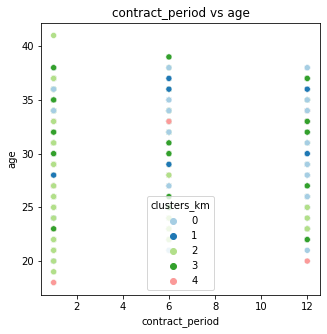

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


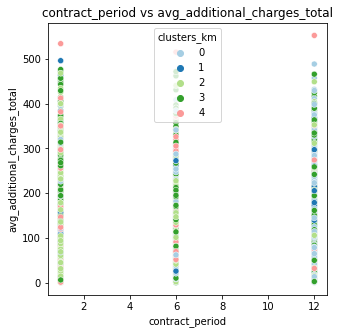

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


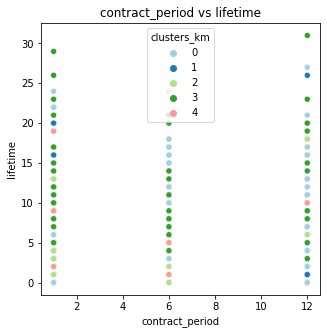

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


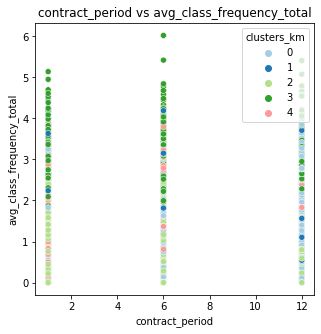

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


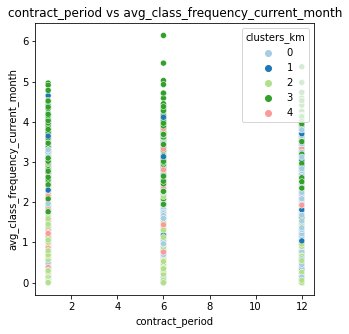

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


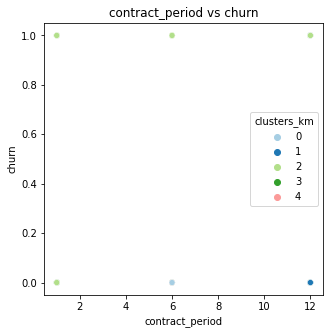

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


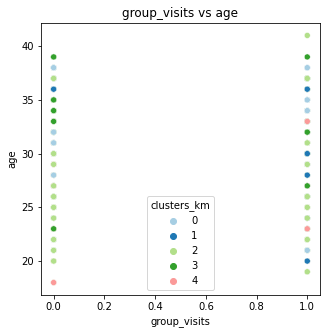

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


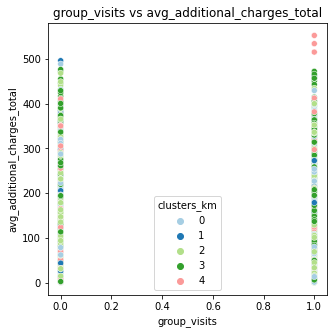

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


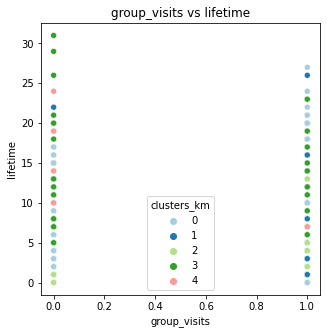

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


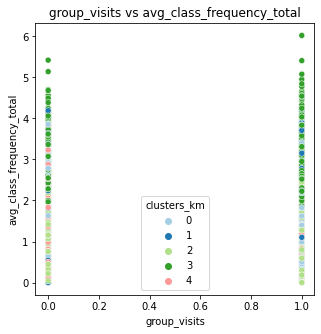

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


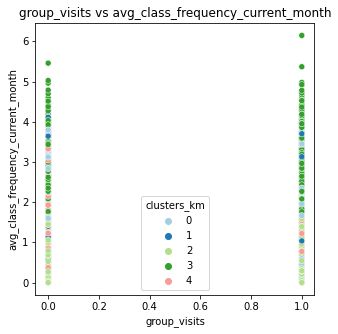

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


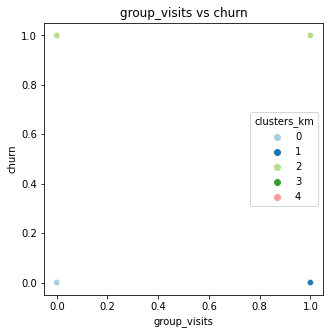

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


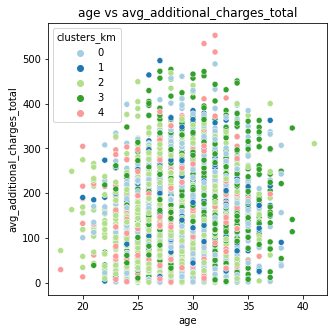

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


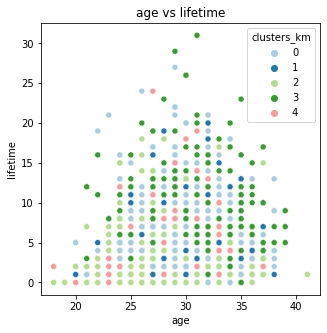

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


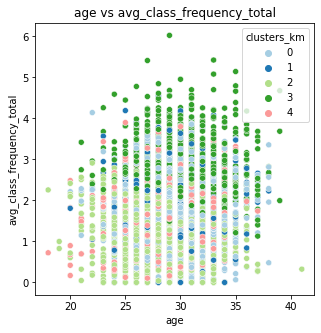

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


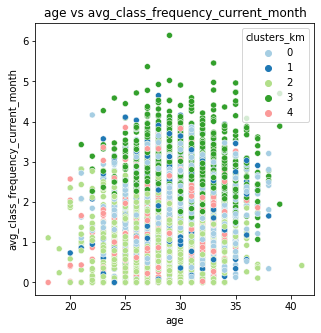

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


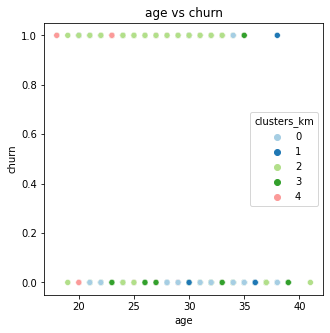

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


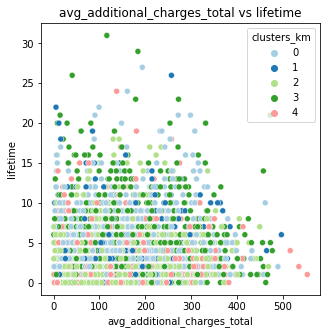

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


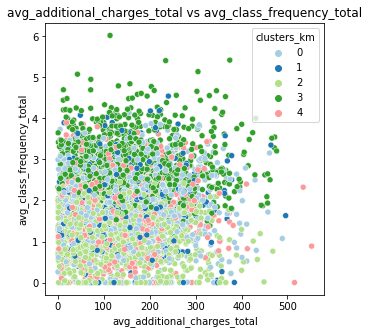

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


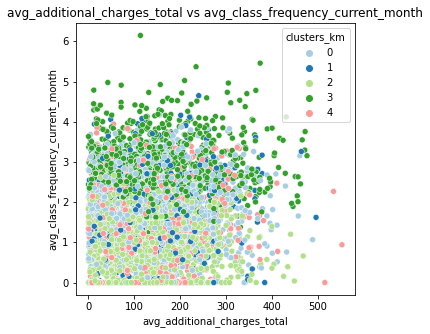

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


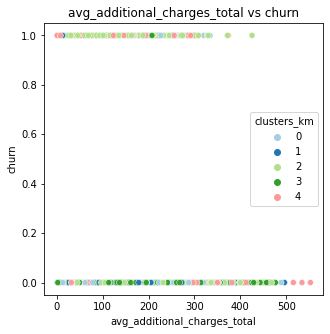

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


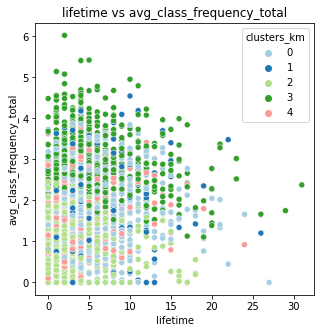

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


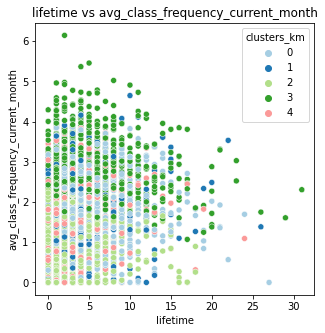

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


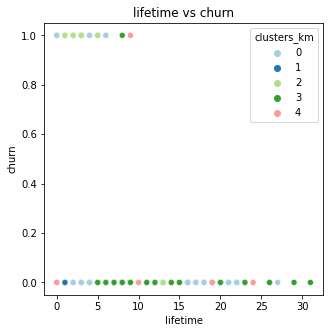

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


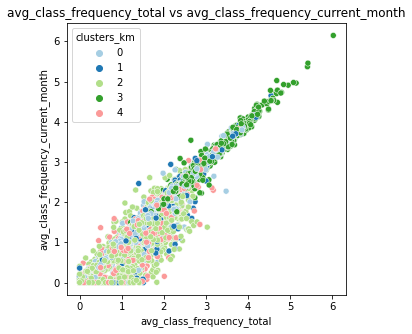

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


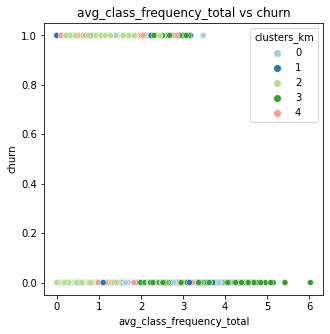

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


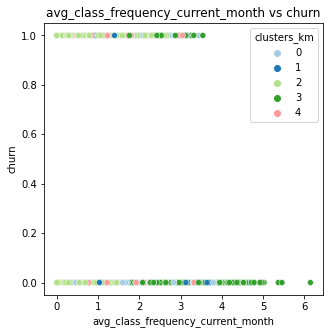

In [49]:
for pair in col_pairs:
    show_clusters_on_plot(df, pair[0], pair[1], 'clusters_km')

In [50]:
# проверим нашу кластеризацию по метрике silhouette
from sklearn.metrics import silhouette_score
silhouette_score(X_sc, labels)

0.14016592006620443

In [51]:
#Для каждого полученного кластера посчитаem долю оттока
df.groupby('clusters_km')['churn'].mean()

clusters_km
0    0.102513
1    0.267532
2    0.502110
3    0.041020
4    0.420263
Name: churn, dtype: float64

## Выводы

Выводы по итогам проделанной работы:
1. Предобработка данных показала, что пропусков нет, дубликатов тоже нет;
2. Доля оттока составляет 27% от всех клиентов выборки;
3. Показатели среднего и стандартного отклонения на первый взгляд не вызывают вопросов;
4. Изучив показатели средних значений тех, кто ушел и тех, кто остался можно сделать следующие предварительные заключения:
   - в рамках акции "Приведи друга" в итоге остается практически в два раза больше людей, чем уходят;
   - у тех кто попадает в отток, в среднем длительность абонемента составляет 1,7 месяцев, напротив те кто остаются приобретают в среднем абонемент на полгода;
   - те кто в оттоке в среднем значительно реже посещают групповые занятия;
   - посетители, которые собираются и дальше ходить в спортзал имеют на руках абонемент с длительностью более 5 месяцев, в то время, как у противоположной группы до конца срока действия абонимента остается меньше 2-х месяцев;
   - lifetime у тех, кто остается составляет около 5-ти месяцев, те кто в уходит в отток этот показатель составляет в среднем около 1-го месяца;
   - за месяц до оттока люди наинают посещать спортзал в два раза реже в неделю, чем те, кто остается;
   - остальные признаки в среднем идентичны у обеих групп.
5. Исследуя графики можно увидеть, что:
   - отток у мужчин и женщин одинаков;
   - подавляющее большинство посетителей либо живут, либо работают в том же районе, где находится фитнес-центр. Незначительная часть посетителей приезжают из других районов, но и отток среди них существенный (приблезительно 2/3 от тех, кто остался);
   - по партнерской программе приходят незначительно больше посетителей, чем остальных, но отток среди них значительно меньше;
   - по акции "приведи друга" приходят меньше, чем без нее, но отток среди друзей гораздо ниже;
   - телефон оставляют практически всегда, но на соотношении оттока и оставшихся среди тех кто оставил номер телефона и нет это не влияет;
   - больше половины всех посетителей берут абонимент на 1 месяц, но и отток среди них значительный. С увеличением срока абонимента доля оттока сокращается;
   - отток, тех кто посещает групповые занятия более чем в два раза меньше, чем у тех, кто не посещает;
   - среди посетителей не достигших возраста 25 лет отток стабильно больше притока, а начиная с 25 лет картина меняется. Основная часть - посетители от 25 до 35 лет. С у величением возраста отток уменьшается;
   - с увеличением суммы трат на сопутствующие услуги фитнес-центра снижается доля оттока;
   - значительная часть оттока есть среди тех у кого до окончания срока абонимента остается 1 месяц, это коррелирует с признаком срока действия абонимента. Этот признак удаляем;
   - lifetime у тех, кто остается составляет около 5-ти месяцев, те кто в уходит в отток этот показатель составляет в среднем около 1-го месяца;

Самые надежные клиенты это 0 и 3 кластеры. 
Сильные стороны 0 кластера - живут или работают в одном районе с фитнес-центром, чаще остальных пользуются акцией "приведи друга" и партнерской программой, чаще всех посещают групповые занятия и имеют в среднем больше остальных годовые абонименты. Скорее всего это местные жители и сотрудники близлежащих организаций.
Сильные стороны 3 кластера - они так же живут рядом, в среднем больше всех тратят на сопутствующие услуги фитнес-центра, чаще остальных посещают спортзал и у них довольно высокий показатель посещения групповых занятий.

## Рекомендации

Исходя из вышеперечисленных выводов предлагаю:
1. Чаще проводить акции типа "приведи друга";
2. Продолжать партнериться с организациями района;
3. Сделать акцию со скидкой на годовой абонимент;
4. Проанализировать посещаемость групповых занятий и по итогу, либо оптимизировать и  расширить, либо увеличить.
5. Поддерживать и улучшать сопутствующие услуги (кафе, спорттовары, косметический и массажный салон и т.д.)